# To Predict Diabetes using PIMA diabetes Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetes=pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Check for Missing Value:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

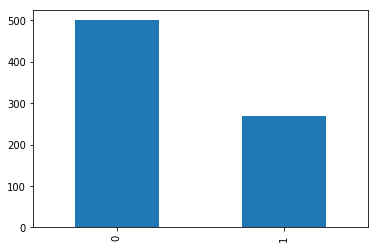

In [7]:
diabetes['Outcome'].value_counts().plot(kind='Bar')

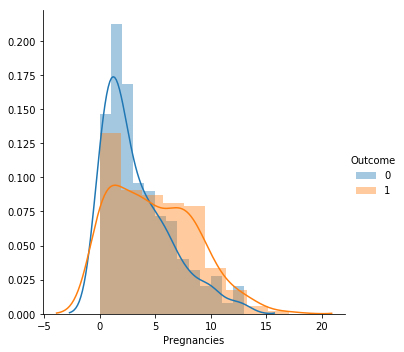

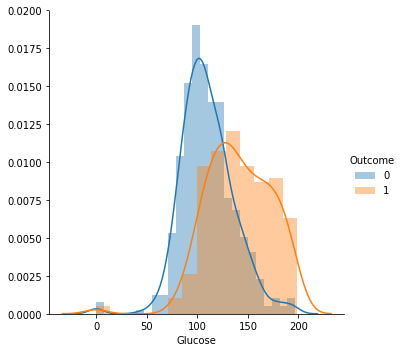

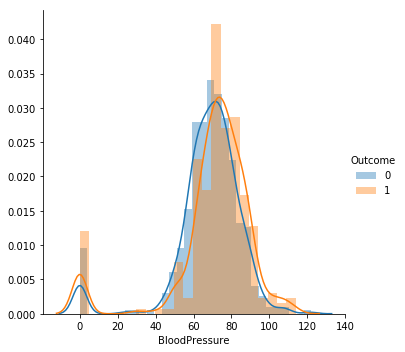

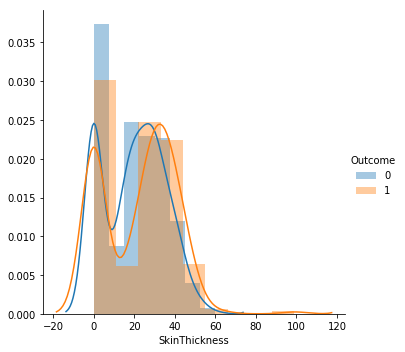

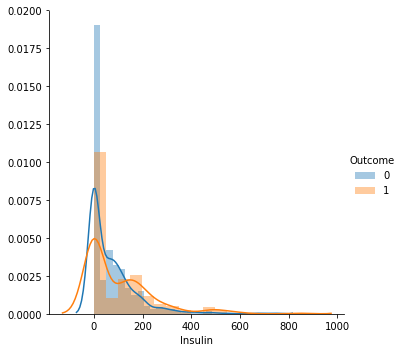

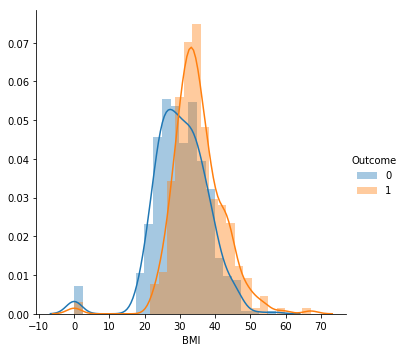

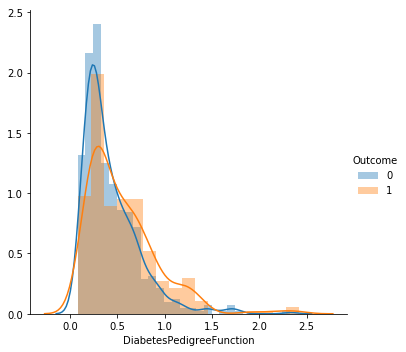

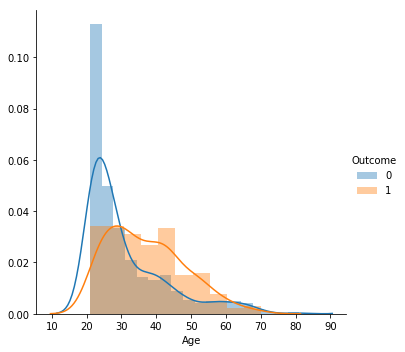

In [8]:
#Distribution Plot of all the variables:
#list(diabetes.columns)[:-1]
for i in list(diabetes.columns)[:-1]:
    sns.FacetGrid(diabetes,hue='Outcome',height=5)\
        .map(sns.distplot,i).add_legend()

In [ ]:
#PairPlot
#diabetes['Outcome']=diabetes['Outcome'].map({1:'Yes',0:'No'})
#sns.pairplot(diabetes,hue='Outcome')

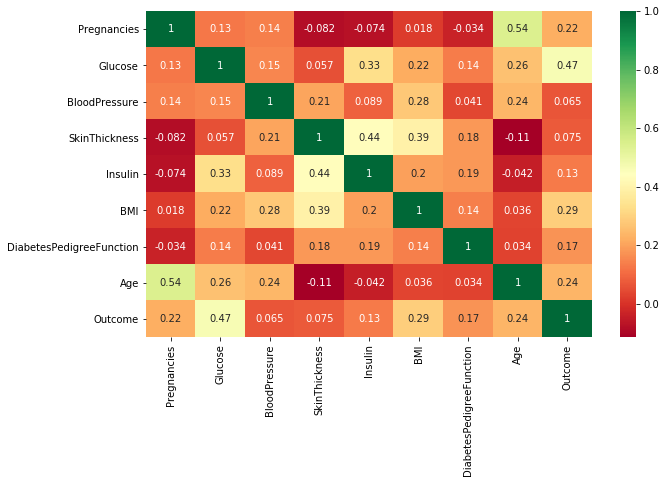

In [9]:
corr1=diabetes.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr1,annot=True,cmap='RdYlGn')

In [10]:
#By looking at the describe method there are some features have zero as minimum value which is wrong.
#Check how many other missing(zero) values:
#replacing the zero value with nan value:
col=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in col:
    diabetes[i]=diabetes[i].replace(0,np.NaN)

In [11]:
#Missing Value Check:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
#Using fillna method to fill the missing value of the above column:
for i in col:
    print(i)
    diabetes[i]=diabetes.groupby('Outcome')[i].transform(lambda x:x.fillna(x.mean()))

Glucose
BloodPressure
SkinThickness
Insulin
BMI


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=diabetes.drop('Outcome',axis=1)
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [15]:
Y=diabetes['Outcome']

In [16]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
cat=[lr,dt,rf]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=4)
X_train.shape
X_test.shape

(192, 8)

In [17]:
def train_predict(clf,X_train,X_test,Y_train,Y_test):
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(y_pred,Y_test)
    cnf=confusion_matrix(y_pred,Y_test)
    return (acc,cnf)
#plt.plot(y_predict,Y_test)

In [18]:
for i in cat:
    print("The model is {}".format(i))
    acc,cnf=train_predict(i,X_train,X_test,Y_train,Y_test)
    print("The accuracy is {}".format(acc))
    print("\n")
    print("Confusion matrix is {}".format(cnf))
    print("-"*20)

The model is LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\sagar\Anaconda_New\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy is 0.8125


Confusion matrix is [[112  22]
 [ 14  44]]
--------------------
The model is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
The accuracy is 0.84375


Confusion matrix is [[113  17]
 [ 13  49]]
--------------------
The model is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
The accuracy is 0

C:\Users\sagar\Anaconda_New\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
#By using Random Forest i am getting the highest accuracy.

In [19]:
#This code is copied from One of the Towards Data Science Article
#Model Tuning using Hyper paramater:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [20]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [21]:
rsc=RandomizedSearchCV(rf,param_distributions=random_grid,n_iter=5,scoring='roc_auc',n_jobs=1,cv=5,verbose=3)
rsc.fit(X_train,Y_train)
#print(rsc.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, score=0.9193495934959349, total=   8.6s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s remaining:    0.0s


[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, score=0.9772357723577235, total=   8.3s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.8s remaining:    0.0s


[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, score=0.9420000000000001, total=   8.4s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, score=0.945, total=   8.5s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, score=0.9179054054054054, total=   8.7s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, score=0.9063414634146342, total=   3.5s
[CV] n_estimators=800, min_samples_spli

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.4min finished


{'n_estimators': 1800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}


In [22]:
print(rsc.best_estimator_)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=70, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [23]:
rf1=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=90, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rf1.fit(X_train,Y_train)
y_pred=rf1.predict(X_test)
print("The accuracy score is {}".format(accuracy_score(y_pred,Y_test)))

The accuracy score is 0.9114583333333334


In [31]:
#By using the random forest with the hyperparameter our accuracy is increased to 91% which is great.

In [24]:
## Saving model to disk
import pickle
pickle.dump(rf1, open('model.pkl','wb'))

In [ ]:
##Loading the model:
#model = pickle.load(open('model.pkl','rb'))